# Линейная регрессия
__Суммарное количество баллов: 10__


In [63]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy
import seaborn as sns
import pandas as pd

In [2]:
def read_data(path="boston.csv"):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=15)
    X = dataframe[:, :-1]
    y = dataframe[:, -1]
    return X, y

In [3]:
def generate_synthetic(size, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

### Задание 1 (1 балл)
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика MSE. Ее и нужно реализовать.

In [4]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

### Задание 2 (3 балла)
Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [10]:
def add_ones(X):
    n=len(X)
    b = np.ones((n,1))
    X = np.append(b, X, axis=1)
    return X

In [12]:
class NormalLR:
    w = None
    def __init__(self):
        pass
    
    def fit(self, X, y):
        X = add_ones(X)
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y # По формуле
        return
    
    def predict(self, X):
        X = add_ones(X)
        return X @ self.w

In [8]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [13]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.013155716778536653


### Задание 3 (2 балла)
Теперь реализуем линейную регрессию с использованием градиентного спуска с larning rate `alpha` в течении `iterations` итераций.

#### Методы
`fit(X, y)` - приближает решение задачи минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$ при помощи градиентного спуска. 


`predict(X)` - строит предсказание `y` для объектов из `X`.

### Задание 4 (2 балла)
Добавьте в метод `fit` регуляризацию Лассо с коэффициентом `l`. Постройте график зависимости ошибки предсказания данных из синтетического набора данных от коэффициента регуляризации.

In [132]:
class GradientLR:
    alpha = None
    iterations = None
    l = None
    w = None
    def __init__(self, alpha, iterations=10000, l=0.):
        self.alpha = alpha
        self.iterations = iterations
        self.l = l
    
    def fit(self, X, y):
        add_ones(X)
        self.w = np.zeros(len(X[0]))
        
        for _ in range(self.iterations):
#             print(self.w)
            grad = 2/len(X) * (X.T @ ((X @ self.w) - y)) + self.l * np.sign(self.w)# Производная модуля - sign
            self.w -= self.alpha * grad
        
    def predict(self, X):
        add_ones(X)
        return X @ self.w

In [211]:
def build_plot(X_train, y_train, X_test, y_test, step = 0.0001, n_steps = 100, alpha = 0.1):
    l = 0
    df = pd.DataFrame(columns = ["error", "l"])
    for i in range(n_steps):
        l+=step
        model = GradientLR(alpha, iterations=10000, l = l)
        model.fit(X_train, y_train)
        df = df.append({"error" : mse(y_test, model.predict(X_test)), "l" : l}, ignore_index = True)
#         print(mse(y_test, regr.predict(X_test)))
    ax = sns.lineplot(x="l", y="error", data=df)
    ax.set(ylabel='Error', xlabel='Lasso regularization coefficient')
    plt.show()
        

In [212]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

0.13704181885725822


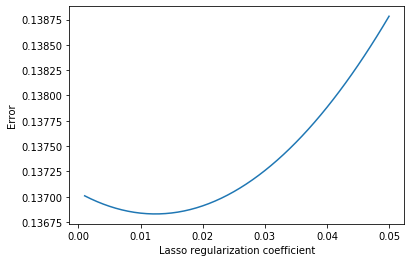

In [215]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test, n_steps = 50, step = 0.001)

### Задание 5 (2 балла)
Протесируйте оба метода на данных cancer и spam, для градиентного спуска постройте график зависимости ошибки от коэффициента регуляризации. 

In [216]:
from sklearn.preprocessing import StandardScaler

In [217]:
df = pd.read_csv("./spam.csv")
X = df.iloc[:, :-1]
y = df["label"]
X = StandardScaler().fit_transform(X)

In [218]:
# X, y = read_data("./spam.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

In [219]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.18996404389209218


0.6290619486341827


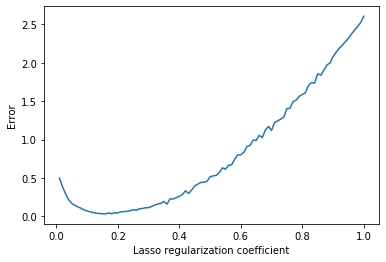

In [220]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test, step = 0.01, n_steps = 100)

In [221]:
df = pd.read_csv("./cancer.csv")
X = df.iloc[:, 1:]
y = df.iloc[:, 0].map(lambda x: x == "M")
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

In [222]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.0598687598344065


0.1600123615067001


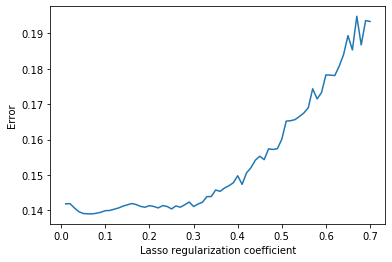

In [223]:
regr = GradientLR(0.005, iterations=10000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test, step = 0.01, n_steps = 70, alpha = 0.005)

In [224]:
X, y = read_data() # boston
y = StandardScaler().fit_transform(np.reshape(y, (-1, 1)))
X = StandardScaler().fit_transform(X)
y = y.reshape((1,-1))[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)


In [225]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.3885339389789079


0.2797968656099677


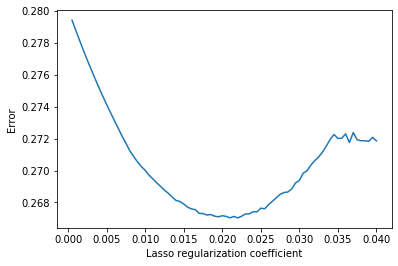

In [226]:
regr = GradientLR(0.005, iterations=10000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test, step = 0.0005, n_steps = 80, alpha = 0.01)